## Import as bibliotecas
Vamos importar algumas bibliotecas para começar!

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # biblioteca de visualização utilizada pelo pandas e pelo seaborn
import seaborn as sns # biblioteca de visualização com mais opções de gráficos
 #comando necessário para que as imagens sejam exibidas aqui mesmo no notebook
%matplotlib inline

## 1. Acessando os dados

* Utilize a função **pd.read_csv** para ler o dado preprocessado e salve-o na variável **train**
    - O nome do dataset é **titanic_ready_to_ml.csv**
    - Visualize alguns elementos do seu data set, para isto use **train.head()**

In [5]:
train = pd.read_csv("titanic_ready_to_ml.csv")
train.head(10)

,Survived,Age,SibSp,Parch,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,...,Ticket_S_13,Ticket_S_15,Ticket_S_16,Ticket_S_17,Ticket_S_18,Ticket_S_7,Ticket_S_9,Ticket_W_10,Ticket_W_11,Ticket_W_9
0,0,22.0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,24.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,54.0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,2.0,3,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,27.0,0,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,14.0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Vejo o exemplo do iris

# 2. Importando mais bibliotecas

#### Vamos importar mais arquivos necessários.

In [10]:
# importe train_test_split do módulo sklearn.model_selection
# importe a biblioteca sklearn. 
# importe a classe DecisionTreeClassifier do módulo sklearn.tree. 
# importe as classes classification_report e confusion_matrix do módulo
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Separe os dados em teste e treino

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

### Crie um objeto do classificador DecisionTreeClassifier()

In [39]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=100)

### Treine o modelo chamando a função fit

In [40]:
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Faça as predições

In [41]:
predictions = dtc.predict(X_test)
predictions2 = rfc.predict(X_test)

In [42]:
labels = ['business', 'health']
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
cnf_matrix

array([[ 77,  27],
       [ 27, 136]])

In [43]:
labels = ['business', 'health']
cnf_matrix2 = confusion_matrix(y_test, predictions2, labels=[1,0])
cnf_matrix2

array([[ 80,  24],
       [ 24, 139]])

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions, labels=[0,1]).ravel()
tn, fp, fn, tp 

(136, 27, 27, 77)

In [45]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, predictions2, labels=[0,1]).ravel()
tn2, fp2, fn2, tp2 

(139, 24, 24, 80)

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 77  27]
 [ 27 136]]


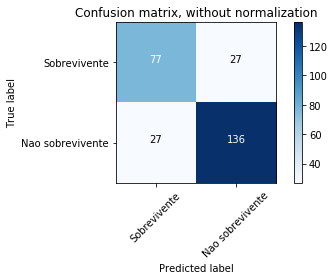

In [51]:
plot_confusion_matrix(cnf_matrix, classes=['Sobrevivente','Nao sobrevivente'],
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[ 80  24]
 [ 24 139]]


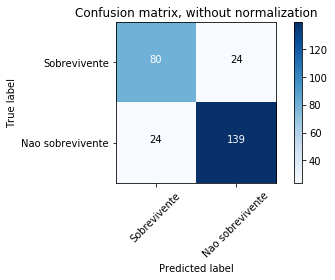

In [50]:
plot_confusion_matrix(cnf_matrix2, classes=['Sobrevivente','Nao sobrevivente'],
                      title='Confusion matrix, without normalization')

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       163
           1       0.74      0.74      0.74       104

   micro avg       0.80      0.80      0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [48]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       163
           1       0.77      0.77      0.77       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



,value
Prenome_ Mr,0.301485
Z_Fare,0.193891
Age,0.173378
Class_3,0.069880
Ticket_1_5,0.030456
Parch,0.030311
Prenome_ Rev,0.026338
Ticket_1_4,0.021555
Prenome_ Miss,0.016376
Ticket_3_6,0.015285


### Desafios

* Treinar a arvore somente com os quatro features.
* Plote num gráfico as variáveis mais importantes
* Plote em um scatterplot duas variáveis no eixo x e y das principais variáveis, e faça a distinção das classes. Veja este [exemplo](https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69)
